<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means II by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the bloood varied with sport body size and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
while blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style
%matplotlib inline

### 1. Import the data

In [2]:
ais = pd.read_csv('ais.csv')

### 2. Do some EDA of relationships between features.

In [3]:
# Shape
ais.shape

(202, 14)

In [4]:
# Head
ais.head().T

,0,1,2,3,4
Unnamed: 0,1,2,3,4,5
rcc,3.96,4.41,4.14,4.11,4.45
wcc,7.5,8.3,5,5.3,6.8
hc,37.5,38.2,36.4,37.3,41.5
hg,12.3,12.7,11.6,12.6,14
ferr,60,68,21,69,29
bmi,20.56,20.67,21.86,21.88,18.96
ssf,109.1,102.8,104.6,126.4,80.3
pcBfat,19.75,21.3,19.88,23.66,17.64
lbm,63.32,58.55,55.36,57.18,53.2


In [5]:
# Tail
ais.tail().T

,197,198,199,200,201
Unnamed: 0,198,199,200,201,202
rcc,4.9,5.66,5.03,4.97,5.38
wcc,7.6,8.3,6.4,8.8,6.3
hc,45.6,50.2,42.7,43,46
hg,16,17.7,14.3,14.9,15.7
ferr,90,38,122,233,32
bmi,27.56,23.76,22.01,22.34,21.07
ssf,67.2,56.5,47.6,60.4,34.9
pcBfat,11.79,10.05,8.51,11.5,6.26
lbm,82,72,68,63,72


In [6]:
ais.isnull().sum()

Unnamed: 0    0
rcc           0
wcc           0
hc            0
hg            0
ferr          0
bmi           0
ssf           0
pcBfat        0
lbm           0
ht            0
wt            0
sex           0
sport         0
dtype: int64

In [7]:
# Data Types
ais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
Unnamed: 0    202 non-null int64
rcc           202 non-null float64
wcc           202 non-null float64
hc            202 non-null float64
hg            202 non-null float64
ferr          202 non-null int64
bmi           202 non-null float64
ssf           202 non-null float64
pcBfat        202 non-null float64
lbm           202 non-null float64
ht            202 non-null float64
wt            202 non-null float64
sex           202 non-null object
sport         202 non-null object
dtypes: float64(10), int64(2), object(2)
memory usage: 22.2+ KB


In [8]:
ais.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,202.0,101.500000,58.456537,1.00,51.2500,101.500,151.750,202.00
rcc,202.0,4.718614,0.457976,3.80,4.3725,4.755,5.030,6.72
wcc,202.0,7.108911,1.800337,3.30,5.9000,6.850,8.275,14.30
hc,202.0,43.091584,3.662989,35.90,40.6000,43.500,45.575,59.70
hg,202.0,14.566337,1.362451,11.60,13.5000,14.700,15.575,19.20
ferr,202.0,76.876238,47.501239,8.00,41.2500,65.500,97.000,234.00
bmi,202.0,22.955891,2.863933,16.75,21.0825,22.720,24.465,34.42
ssf,202.0,69.021782,32.565333,28.00,43.8500,58.600,90.350,200.80
pcBfat,202.0,13.507426,6.189826,5.63,8.5450,11.650,18.080,35.52
lbm,202.0,64.873713,13.070197,34.36,54.6675,63.035,74.750,106.00


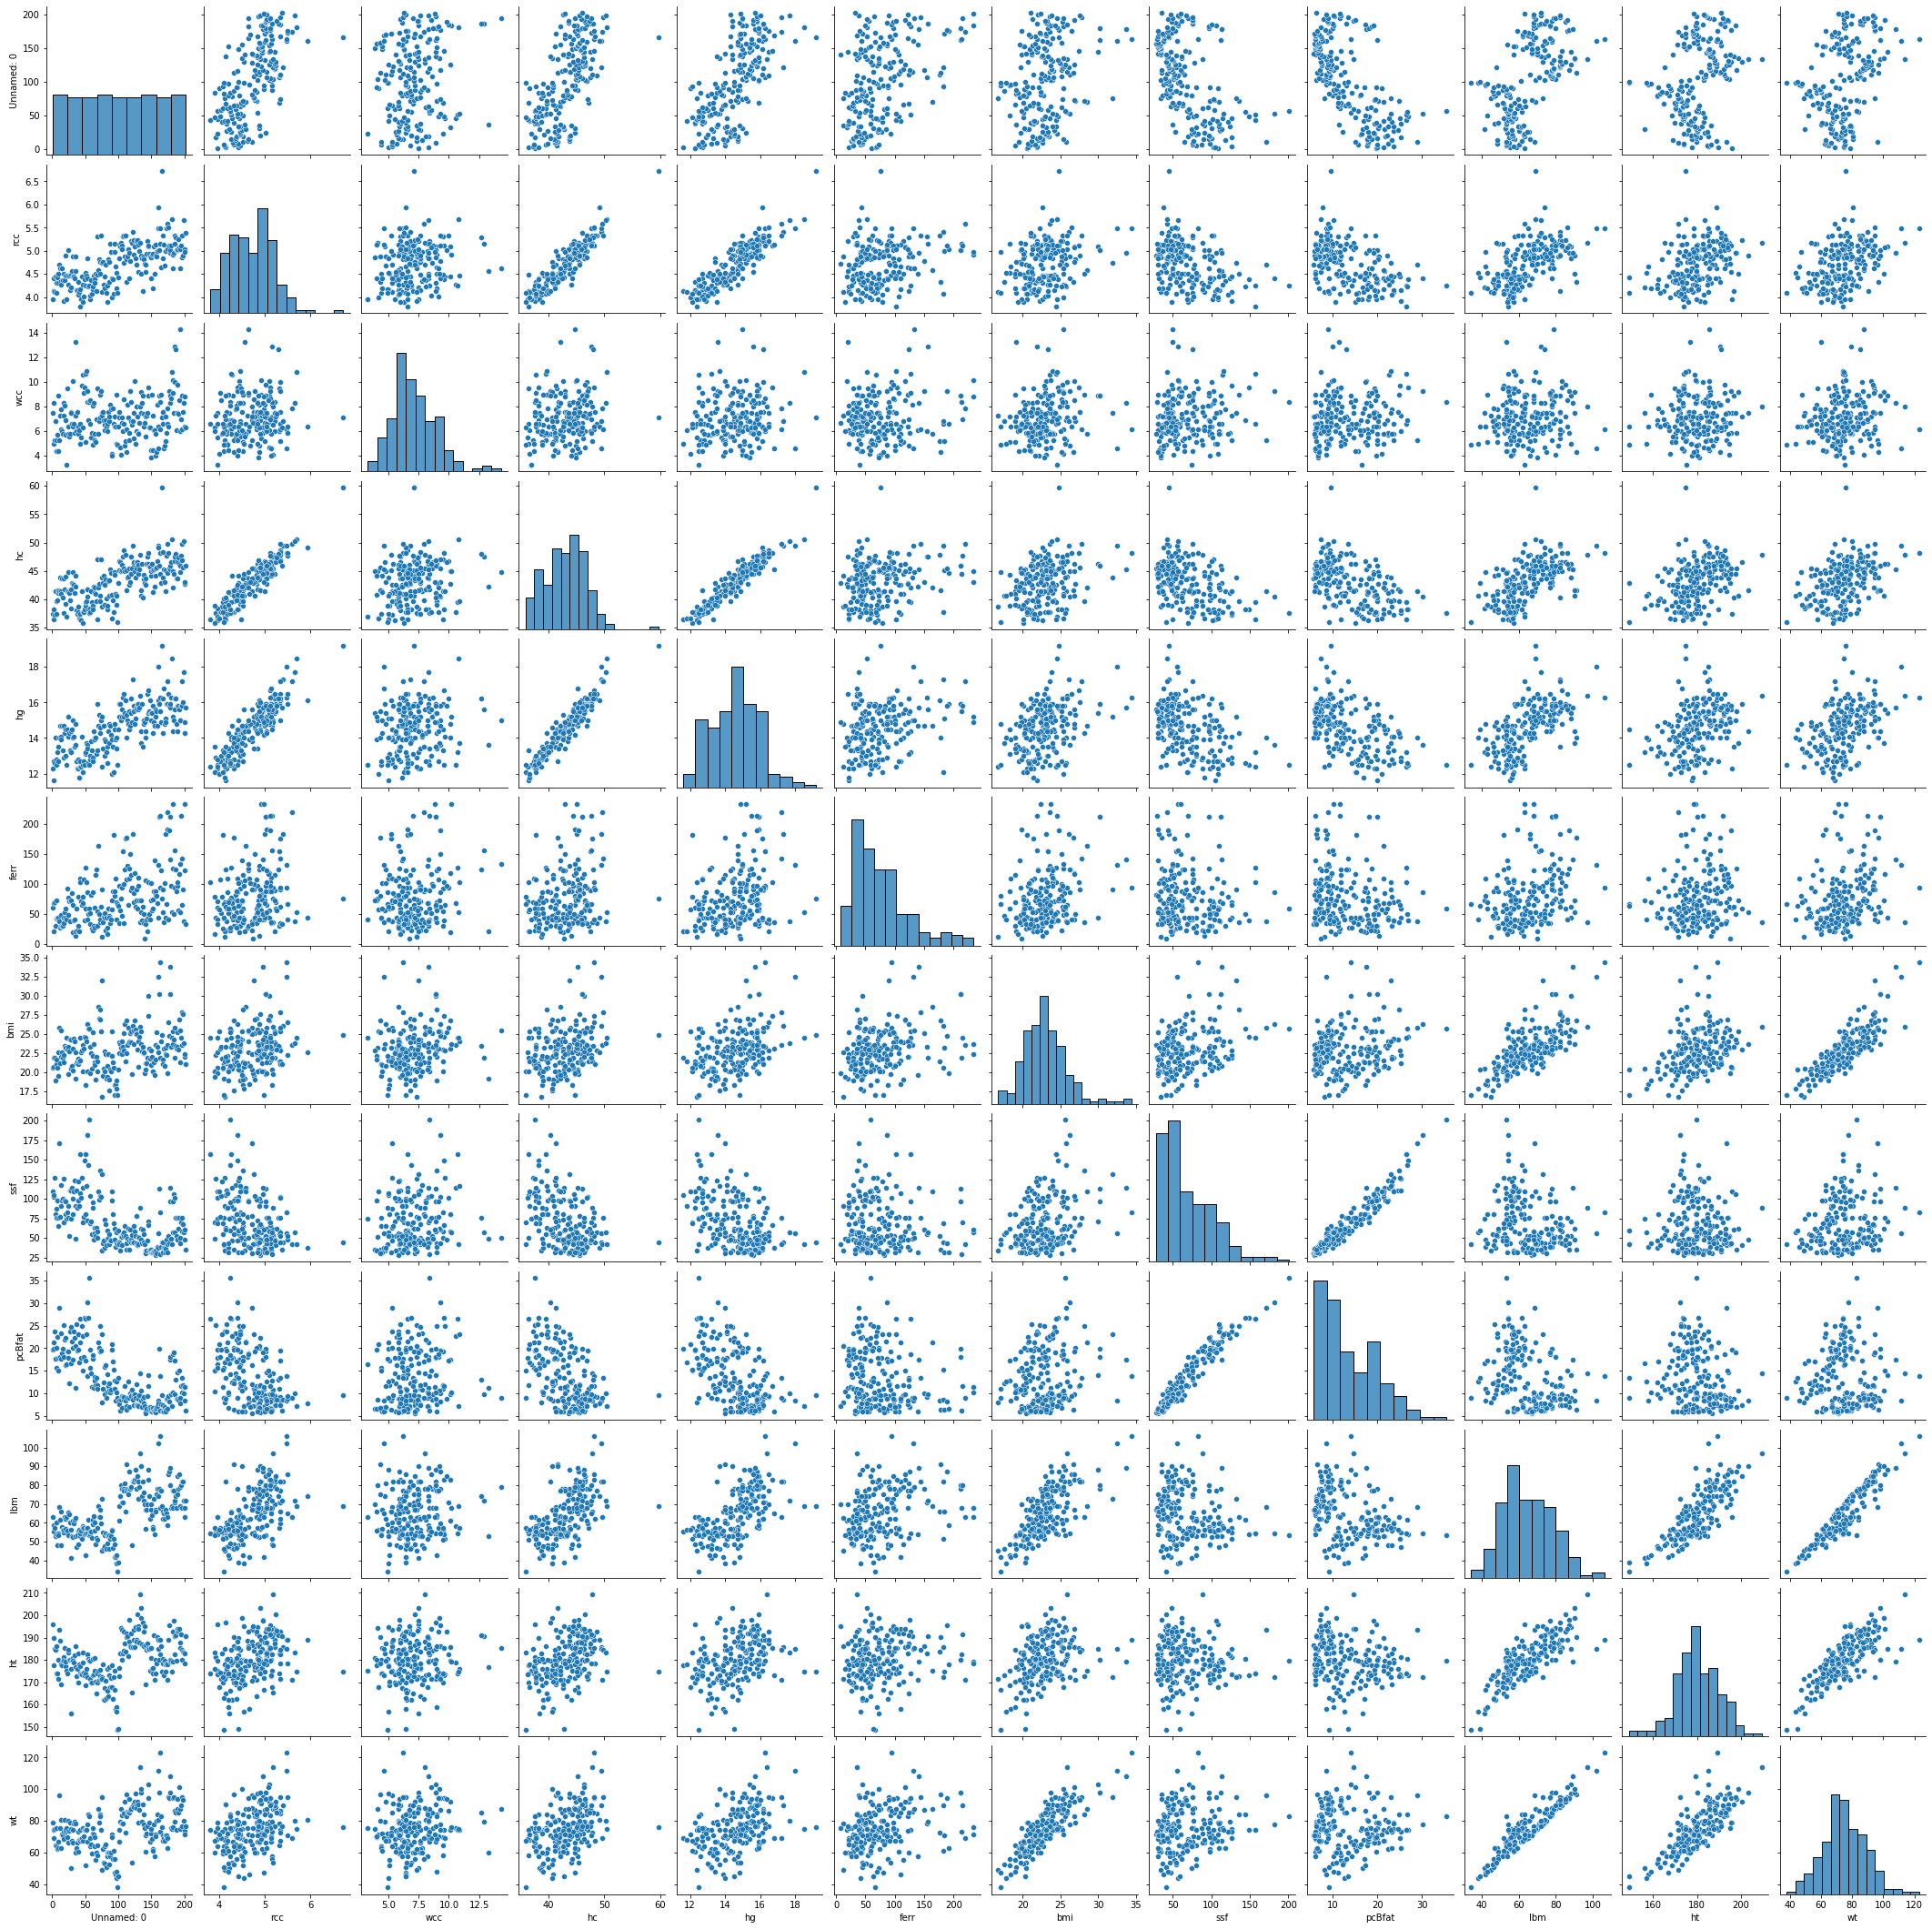

In [9]:
sns.pairplot(ais)
plt.show()

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [10]:
# ANSWER
ais = ais.drop(['Unnamed: 0'], axis = 1)
X = ais.drop(['sex', 'sport'], axis = 1)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Lets try using 2, 4. Run the clustering algorithm with each of those k values.

In [12]:
# ANSWER
from sklearn.cluster import KMeans
k=2
# 2 Clusters
k_mean2 = KMeans(n_clusters = k)
k_mean2.fit(Xscaled)

KMeans(n_clusters=2)

### 5. Get the Labels of each point 

In [13]:
# ANSWER
labels_2=k_mean2.labels_
print(labels_2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [14]:
k_mean2.cluster_centers_

array([[ 0.70714441,  0.11404723,  0.72326046,  0.74397249,  0.4015262 ,
         0.42254737, -0.4658378 , -0.61749595,  0.78290521,  0.57003551,
         0.60358679],
       [-0.72128729, -0.11632817, -0.73772567, -0.75885194, -0.40955673,
        -0.43099832,  0.47515455,  0.62984587, -0.79856332, -0.58143622,
        -0.61565853]])

In [15]:
k_mean2.n_iter_

5

### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the `inertia` attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero. 

In [17]:
# ANSWER
Sum_of_squared_distances = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Xscaled)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\65911\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Plot the sum of squared distances vs. k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

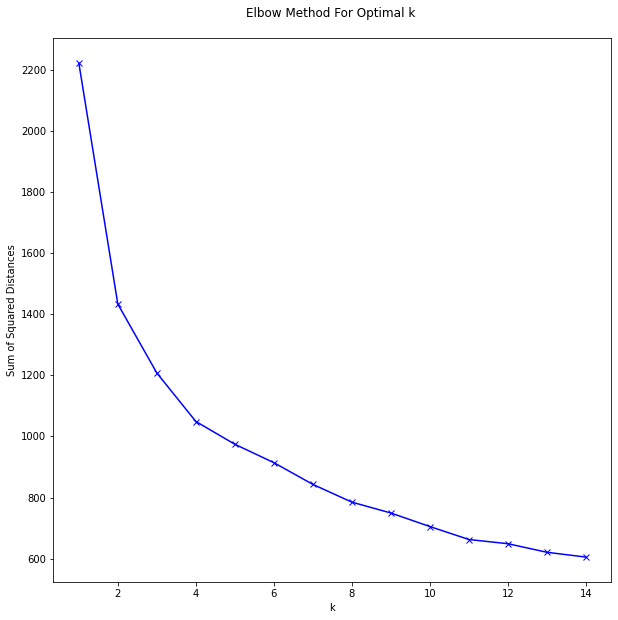

In [18]:
# ANSWER
plt.figure(figsize=[10,10])
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k \n')
plt.show()

### 7. Plot `pcBfat` vs. `wt` using the clusters from each model.

- Plot pcBfat, wt using hue = sex
- Plot pcBfat, wt using hue = labels indentified by the model


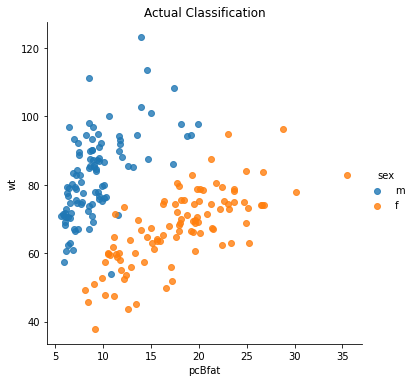

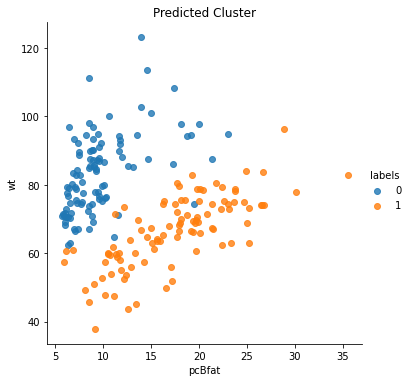

In [19]:
# ANSWER

ais_labels = ais
ais_labels['labels'] = labels_2

sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='sex', 
           hue_order=['m', 'f'], fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='labels', fit_reg=False)
plt.title('Predicted Cluster')
plt.show();

Repeat for k = 4

In [20]:
# ANSWER

# 4 Clusters
K = 4
kmeans_model = KMeans(n_clusters=K).fit(X)

labels_4 = kmeans_model.labels_
print(labels_4)

[1 1 1 1 3 3 1 1 3 3 1 3 1 1 1 1 1 3 1 1 3 3 2 1 2 2 1 1 3 1 1 3 1 1 3 3 1
 3 1 1 3 1 1 1 1 1 2 2 1 3 1 1 1 3 1 1 3 1 2 3 1 1 3 3 3 2 2 3 3 0 1 1 1 1
 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 2 0 3 2 2 3 3 3 3 3 2 3 2 2 3 0 2 3 2 0
 2 0 2 3 2 2 0 2 2 2 0 2 2 2 2 2 2 3 2 2 2 1 3 2 3 3 3 3 3 2 3 3 3 3 2 3 3
 2 2 3 2 3 2 2 2 2 2 2 2 3 0 2 0 2 2 3 2 3 2 0 3 3 0 0 3 0 0 0 2 3 2 0 1 1
 0 2 2 2 2 3 2 3 2 0 0 3 2 3 2 0 3]


In [21]:
kmeans_model.cluster_centers_

array([[  5.0085    ,   7.63      ,  45.45      ,  15.545     ,
        186.45      ,  24.9595    ,  62.205     ,  11.374     ,
         73.1805    , 182.095     ,  82.895     ],
       [  4.42520833,   7.12708333,  40.42708333,  13.6125    ,
         59.16666667,  23.63229167, 115.20416667,  22.164375  ,
         58.99916667, 179.02708333,  75.8       ],
       [  4.87133333,   6.99166667,  44.51833333,  15.12      ,
         97.41666667,  23.552     ,  52.92333333,  10.074     ,
         71.89766667, 183.53      ,  79.96166667],
       [  4.70675676,   7.05135135,  43.02567568,  14.47162162,
         42.09459459,  21.4922973 ,  53.96081081,  11.25256757,
         60.74405405, 177.48648649,  68.34594595]])

In [22]:
kmeans_model.n_iter_

7



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



